# Exercise: Using `matplotlib` to plot 

Having one variable on a chart is good, but is two better? In this exercise, you'll practice adding two variables to the same chart. You will also learn how to create a chart that has two different graphs on it on the same figure!

**Download historical data for 2 years from one ticker**

Use the YFinance package to download 2 years of data for any ticker you'd like. 

In [6]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [7]:
stock_ticker = 'AAPL'
start_date = '2020-01-01' # use format YYYY-MM-DD
end_date = '2024-01-02'

data = yf.download( stock_ticker, start= start_date, end = end_date ) 

[*********************100%***********************]  1 of 1 completed


**Calculate the 20-day and 50-day moving average**

Use Pandas methods to calculate the 20-day and 50-day moving averages for your ticker.

In [8]:
data['MA_20'] = data['Close'].rolling(window=20).mean()
data['MA_50'] = data['Close'].rolling(window=50).mean()

**Plot the daily and moving average data on the same plot**

Use `matplotlib` and plot all 3 of these variables on the same line plot: closing price, 20-day moving average, and 50-day moving average. 

Make sure to use a different color for each variable. You can also practice adding a title and x-axis and y-axis labels to your chart. Optionally, you can add gridlines. 

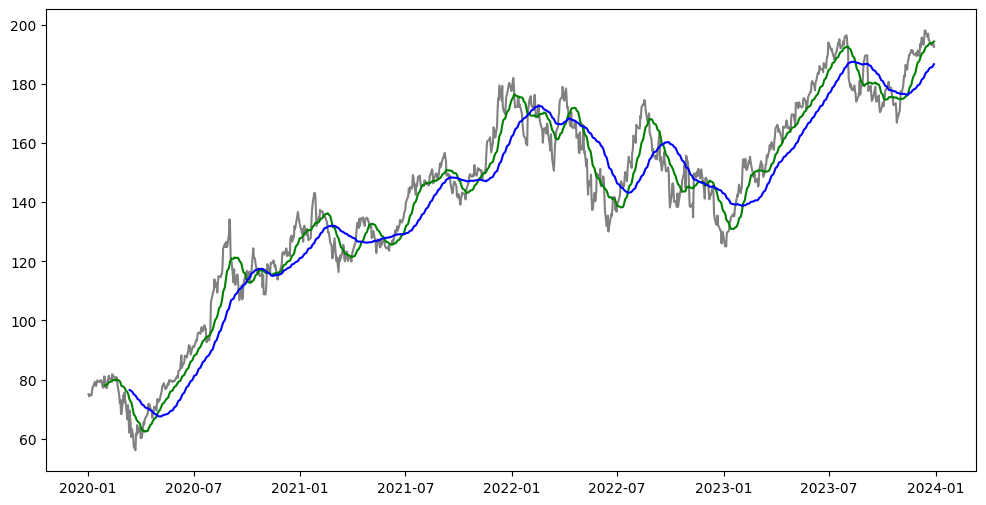

In [9]:
# make plot with 3 lines on it

plt.figure(figsize=(12,6))
plt.plot(data['Close'], label='Closing Price', color='gray')
plt.plot(data['MA_20'], label='20-day MA Price', color='green')
plt.plot(data['MA_50'], label='50-day MA Price', color='blue')




**Create plot with 2 subplots**

In this challenge, you'll be adding two different graphs to the same figure! This means that you'll have two different charts in one image. 

To do this in `matplotlib`, you'll be using the axes attribute of the `figure`. Recall that the `figure` is the canvas on which you draw your plots. You'll use a single figure, but add multiple axes to it, then you can put a different graph in each axes. 

Note that you're creating not just a `fig` like before, but now you're creating both a `fig` and `axes`:
```python
fig, ax = plt.subplots( num_subplots, figsize=(x,y), sharerx=True/False)
```

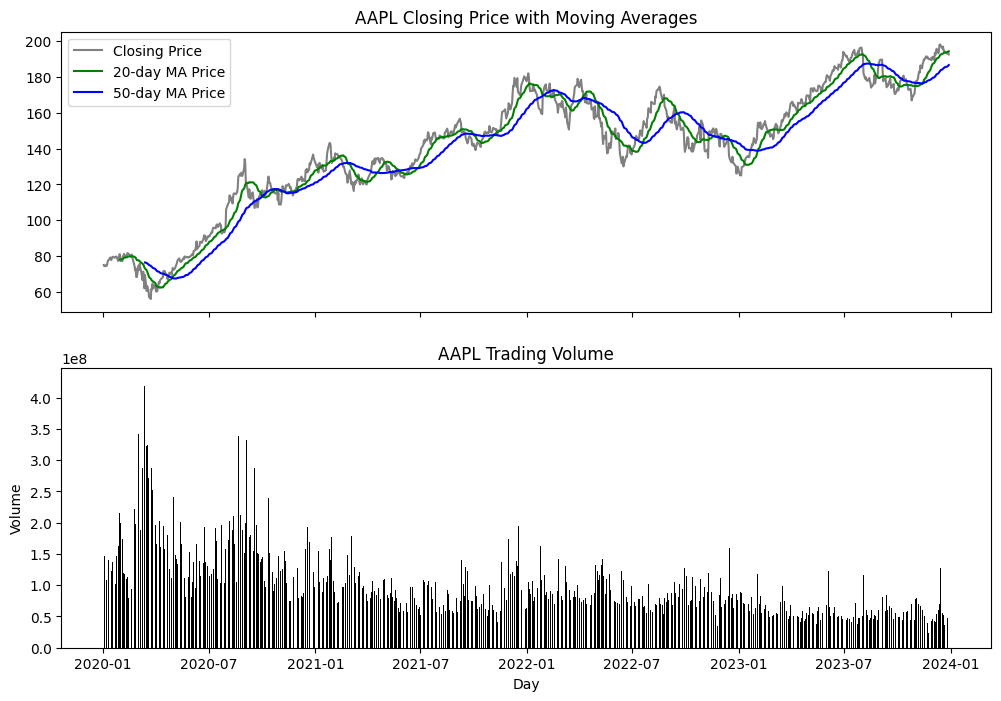

In [13]:
# create a figure with two axes
fig, ax = plt.subplots(2, figsize=(12,8), sharex = True) # this is the foundation of creating multiple charts on one figure


# ax[0] creates the first chart. You'll want to add all 3 line plots to it: 

ax[0].plot(data['Close'], label='Closing Price', color='gray')
ax[0].plot(data['MA_20'], label='20-day MA Price', color='green')
ax[0].plot(data['MA_50'], label='50-day MA Price', color='blue')
ax[0].set_title('AAPL Closing Price with Moving Averages') # add a title for this graph
ax[0].legend()

# ax[1] creates the second, separate chart on the same figure
ax[1].bar(data.index, data['Volume'], label='Trading Volume', color='black') #replace ... and add a bar chart of daily trading volume. Remember that trading volumne is a column in the data you imported above
ax[1].set_title("AAPL Trading Volume") # set a title
ax[1].set_xlabel("Day") # set a title for the x-axis
ax[1].set_ylabel("Volume") # set a title for the y-axis 

plt.show()
